In [1]:
from google.colab import drive

# Esto te pedirá que autorices a Colab para acceder a tu Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Reemplaza 'ruta/a/tu/archivo/reddit_depression_dataset.csv' con la ruta real de tu archivo en Google Drive.
file_path = '/content/drive/My Drive/Trabajo Inteligencia Artificial/Notebooks/Cuadernos trabajo/reddit_depression_dataset.csv'

try:
    df = pd.read_csv(file_path, low_memory=False)
    print("Dataset cargado exitosamente.")
    display(df.head())
except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta especificada: {file_path}")
    print("Por favor, verifica la ruta de tu archivo en Google Drive.")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Dataset cargado exitosamente.


,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",4.0,1.405309e+09,NaN,0.0
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,4.0,1.410568e+09,1.0,0.0
2,47957,DeepThoughts,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,6.0,1.416458e+09,1.0,0.0
3,47959,DeepThoughts,"""I want to be like water. I want to slip throu...",NaN,25.0,1.416512e+09,2.0,0.0
4,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,5.0,1.416516e+09,4.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470778 entries, 0 to 2470777
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    object 
 1   subreddit     object 
 2   title         object 
 3   body          object 
 4   upvotes       float64
 5   created_utc   float64
 6   num_comments  float64
 7   label         float64
dtypes: float64(4), object(4)
memory usage: 150.8+ MB


In [4]:
df.describe()

,upvotes,created_utc,num_comments,label
count,2.470714e+06,2.470672e+06,2.356801e+06,2.470672e+06
mean,6.260360e+01,1.566474e+09,1.526266e+01,1.944455e-01
std,9.474559e+02,6.987755e+07,7.867238e+01,3.957733e-01
min,0.000000e+00,1.201314e+09,-3.000000e+00,0.000000e+00
25%,5.000000e+00,1.552205e+09,4.000000e+00,0.000000e+00
50%,7.000000e+00,1.578371e+09,7.000000e+00,0.000000e+00
75%,1.000000e+01,1.611540e+09,1.400000e+01,0.000000e+00
max,1.288660e+05,1.672531e+09,2.113100e+04,1.000000e+00


In [5]:
df.isnull().sum()

,0
Unnamed: 0,3
subreddit,20
title,23
body,461051
upvotes,64
created_utc,106
num_comments,113977
label,106


In [6]:
# Explorar la distribución de la variable 'label'
print("Distribución de la columna 'label':")
display(df['label'].value_counts())
print("\nPorcentaje de la distribución de la columna 'label':")
display(df['label'].value_counts(normalize=True))

# Explorar los subreddits más frecuentes
print("\nSubreddits más frecuentes:")
display(df['subreddit'].value_counts().head(10))

Distribución de la columna 'label':


,count
label,
0.0,1990261
1.0,480411



Porcentaje de la distribución de la columna 'label':


,proportion
label,
0.0,0.805555
1.0,0.194445



Subreddits más frecuentes:


,count
subreddit,
teenagers,1956521
depression,290058
SuicideWatch,190364
happy,24609
DeepThoughts,9163
4,10
6,5
5,5
8,2


Tenemos un 80-20 en información de depresión. Por otro lado, en la columna de subreddit hay información que pone 4, 5, 6, 7, 8 que no sabemos qué es. Puede ser que 4 y 5 sean parte de alguno de los etiquetados de arriba.

In [7]:
# Eliminar filas donde la columna 'body' es nula
df_cleaned = df.dropna(subset=['body']).copy()

# Revisar el conteo de nulos en el DataFrame modificado
print("Conteo de valores nulos después de eliminar filas con nulos en 'body':")
display(df_cleaned.isnull().sum())

Conteo de valores nulos después de eliminar filas con nulos en 'body':


,0
Unnamed: 0,3
subreddit,0
title,2
body,0
upvotes,43
created_utc,84
num_comments,84298
label,84


In [8]:
# Rellenar los valores nulos en la columna 'title' con 'No title'
df_cleaned['title'] = df_cleaned['title'].fillna('No title')

# Revisar el conteo de nulos en el DataFrame modificado
print("Conteo de valores nulos después de rellenar nulos en 'title':")
display(df_cleaned.isnull().sum())

Conteo de valores nulos después de rellenar nulos en 'title':


,0
Unnamed: 0,3
subreddit,0
title,0
body,0
upvotes,43
created_utc,84
num_comments,84298
label,84


In [9]:
# Rellenar los valores nulos en la columna 'num_comments' con 0
df_cleaned['num_comments'] = df_cleaned['num_comments'].fillna(0)

# Revisar el conteo de nulos en el DataFrame modificado
print("Conteo de valores nulos después de rellenar nulos en 'num_comments':")
display(df_cleaned.isnull().sum())

Conteo de valores nulos después de rellenar nulos en 'num_comments':


,0
Unnamed: 0,3
subreddit,0
title,0
body,0
upvotes,43
created_utc,84
num_comments,0
label,84


In [10]:
# Rellenar los valores nulos en la columna 'upvotes' con 0
df_cleaned['upvotes'] = df_cleaned['upvotes'].fillna(0)

# Revisar el conteo de nulos en el DataFrame modificado
print("Conteo de valores nulos después de rellenar nulos en 'upvotes':")
display(df_cleaned.isnull().sum())

Conteo de valores nulos después de rellenar nulos en 'upvotes':


,0
Unnamed: 0,3
subreddit,0
title,0
body,0
upvotes,0
created_utc,84
num_comments,0
label,84


In [11]:
# Identificar las filas donde 'label' es nulo y 'subreddit' es 'depression' o 'SuicideWatch'
condition = df_cleaned['label'].isnull() & df_cleaned['subreddit'].isin(['depression', 'SuicideWatch'])

# Rellenar los valores nulos de 'label' con 1 para esas filas
df_cleaned.loc[condition, 'label'] = 1

# Revisar el conteo de nulos en la columna 'label' después de la imputación condicional
print("Conteo de valores nulos en 'label' después de la imputación condicional:")
display(df_cleaned['label'].isnull().sum())

# Opcional: Verificar cuántas filas fueron afectadas por esta imputación
print("\nNúmero de filas afectadas por la imputación condicional en 'label':")
display(condition.sum())

Conteo de valores nulos en 'label' después de la imputación condicional:


np.int64(73)


Número de filas afectadas por la imputación condicional en 'label':


np.int64(11)

In [12]:
# Identificar las filas donde 'label' es nulo y 'subreddit' está en la lista especificada
condition_zero = df_cleaned['label'].isnull() & df_cleaned['subreddit'].isin(['teenagers', 'happy', 'DeepThoughts'])

# Rellenar los valores nulos de 'label' con 0 para esas filas
df_cleaned.loc[condition_zero, 'label'] = 0

# Revisar el conteo de nulos en la columna 'label' después de la segunda imputación condicional
print("Conteo de valores nulos en 'label' después de la segunda imputación condicional:")
display(df_cleaned['label'].isnull().sum())

# Opcional: Verificar cuántas filas fueron afectadas por esta imputación
print("\nNúmero de filas afectadas por la segunda imputación condicional en 'label':")
display(condition_zero.sum())

Conteo de valores nulos en 'label' después de la segunda imputación condicional:


np.int64(42)


Número de filas afectadas por la segunda imputación condicional en 'label':


np.int64(31)

In [13]:
df_cleaned.head()

,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",4.0,1.405309e+09,0.0,0.0
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,4.0,1.410568e+09,1.0,0.0
2,47957,DeepThoughts,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,6.0,1.416458e+09,1.0,0.0
4,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,5.0,1.416516e+09,4.0,0.0
5,47969,DeepThoughts,What is the limit of the knowledge and power a...,"Personally, I think it's infinite. We will alw...",8.0,1.416684e+09,23.0,0.0


In [14]:
# Contar el número de valores únicos en la columna 'Unnamed: 0'
unique_unnamed_count = df_cleaned['Unnamed: 0'].nunique()

print(f"El número de valores únicos en la columna 'Unnamed: 0' es: {unique_unnamed_count}")

El número de valores únicos en la columna 'Unnamed: 0' es: 2009724


In [15]:
# Identificar filas duplicadas basadas en la columna 'body'
duplicate_rows_body = df_cleaned[df_cleaned.duplicated(subset=['body'], keep=False)]

# Mostrar el número de filas duplicadas
print(f"Número de filas duplicadas basadas en la columna 'body': {duplicate_rows_body.shape[0]}")

# Opcional: Mostrar las filas duplicadas (puede ser mucha salida si hay muchas duplicadas)
# display(duplicate_rows_body.sort_values(by='body'))

Número de filas duplicadas basadas en la columna 'body': 79919


In [16]:
# Mostrar algunas filas duplicadas basadas en la columna 'body'
# Ordenamos por 'body' para ver las duplicadas juntas
print("Ejemplos de filas duplicadas basadas en la columna 'body':")
display(duplicate_rows_body.sort_values(by='body').head(10))

Ejemplos de filas duplicadas basadas en la columna 'body':


,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label
374012,1701834,teenagers,What do girls think about seeing a guys boner ...,\n,10.0,1.552848e+09,21.0,0.0
100785,815181,teenagers,[Discussion][Serious] What are your guys's tho...,\n,4.0,1.448589e+09,28.0,0.0
20651,535772,teenagers,Give descriptive titles to some of the cliques...,\n,5.0,1.360088e+09,28.0,0.0
277866,1394953,teenagers,Ask me shit week 2,\n,4.0,1.540096e+09,10.0,0.0
399047,1781651,teenagers,If Internet Explorer is brave enough to ask to...,\n,6.0,1.554575e+09,0.0,0.0
27402,551893,teenagers,Favorite songs thread?,\n,13.0,1.371920e+09,94.0,0.0
2311080,9764332,depression,"Tfw you're afraid of receiving treatment, beca...",\n,203.0,1.524670e+09,43.0,1.0
390037,1752761,teenagers,Anybody wanna play ps4? Apex/Overwatch/r6,\n,4.0,1.553997e+09,6.0,0.0
2228407,9377146,depression,After 2 years not using any drugs I've relapse...,\n,5.0,1.422022e+09,6.0,1.0
267078,1359993,teenagers,"I'm 14, freshman, boy So I like this girl and ...",\n,5.0,1.537324e+09,9.0,0.0


In [17]:
# Identificar filas duplicadas dentro de duplicate_rows_body basadas en 'body' y 'title'
duplicate_body_title = duplicate_rows_body[duplicate_rows_body.duplicated(subset=['body', 'title'], keep=False)]

# Mostrar el número de filas duplicadas basadas en 'body' y 'title'
print(f"Número de filas duplicadas basadas en las columnas 'body' y 'title': {duplicate_body_title.shape[0]}")

# Opcional: Mostrar algunos ejemplos de estas filas
print("\nEjemplos de filas duplicadas basadas en 'body' y 'title':")
display(duplicate_body_title.sort_values(by=['body', 'title']).head(10))

Número de filas duplicadas basadas en las columnas 'body' y 'title': 0

Ejemplos de filas duplicadas basadas en 'body' y 'title':


,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label


In [18]:
print("Conteo actual de valores nulos:")
display(df_cleaned.isnull().sum())

Conteo actual de valores nulos:


,0
Unnamed: 0,3
subreddit,0
title,0
body,0
upvotes,0
created_utc,84
num_comments,0
label,42


Actualmente hemos repasado duplicados (no hay), obtenemos información de body que hay 79919 filas en las que el body es \n, pero el title sí que tiene información. Por lo que deberíamos de unificar title con body para que al analizar el texto tenga en cuenta las dos partes.
En cuanto a los nulos restantes, unnamed es simplemente un índice porque son todo valores únicos. La columna created_utc no entiendo bien qué es y en label probablemente sea por los valores que tenemos números y no la información escrita.
Los siguientes pasos serían, revisar si hay duplicados en created_utc.
En label, revisar los valores 4, 5, 6, 7, 8 si podemos clasificar 4 y 5 con los valores de texto, pues se cambia, pero habría que pensar qué hacer con el resto.

In [19]:
# Filtrar el DataFrame para encontrar filas donde 'body' es '\n'
row_with_newline_body = df_cleaned[df_cleaned['body'] == '\n']

# Mostrar la primera fila encontrada (si existe alguna)
if not row_with_newline_body.empty:
    print("Ejemplo de fila donde el body es '\\n':")
    display(row_with_newline_body.head(1))
else:
    print("No se encontraron filas donde el body es '\\n' en el DataFrame limpiado.")

Ejemplo de fila donde el body es '\n':


,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label
243,48659,DeepThoughts,It's hard to act cool when you have to poop.,\n,5.0,1.471282e+09,2.0,0.0


In [20]:
# Concatenar 'title' y 'body' en una nueva columna 'text'
# Usamos fillna('') para asegurar que los valores nulos no causen errores y añadimos un espacio entre título y cuerpo
df_cleaned['text'] = df_cleaned['title'].fillna('') + ' ' + df_cleaned['body'].fillna('')

# Mostrar las primeras filas con la nueva columna 'text'
print("DataFrame con la nueva columna 'text':")
display(df_cleaned[['title', 'body', 'text']].head())

DataFrame con la nueva columna 'text':


,title,body,text
0,Deep thoughts underdog,"Only when we start considering ourselves, the ...",Deep thoughts underdog Only when we start cons...
1,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,"I like this sub, there's only two posts yet I ..."
2,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,Rebirth! Hello. \nI am the new guy in charge h...
4,Who am I?,You could take any one cell in my body and kil...,Who am I? You could take any one cell in my bo...
5,What is the limit of the knowledge and power a...,"Personally, I think it's infinite. We will alw...",What is the limit of the knowledge and power a...


In [21]:
# Contar las filas donde 'subreddit' es uno de los valores especificados
subreddit_counts = df_cleaned['subreddit'].isin(['4', '5', '6', '7', '8']).sum()

print(f"Número de filas con subreddit en [4, 5, 6, 7, 8]: {subreddit_counts}")

Número de filas con subreddit en [4, 5, 6, 7, 8]: 23


In [22]:
# Filtrar el DataFrame para mostrar filas donde 'subreddit' es uno de los valores especificados
rows_with_specific_subreddit = df_cleaned[df_cleaned['subreddit'].isin(['4', '5', '6', '7', '8'])]

# Mostrar las filas encontradas
if not rows_with_specific_subreddit.empty:
    print("Filas con subreddit en [4, 5, 6, 7, 8]:")
    display(rows_with_specific_subreddit)
else:
    print("No se encontraron filas con subreddit en [4, 5, 6, 7, 8] en el DataFrame limpiado.")

Filas con subreddit en [4, 5, 6, 7, 8]:


,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label,text
33038,Edit: Pictures of not well-known animals could...,6,1376650800,43,0.0,NaN,0.0,NaN,1376650800 43
33282,Please don't give any personal information awa...,5,1376835553,45,0.0,NaN,0.0,NaN,1376835553 45
33400,Edit: People who aren't going back to school y...,5,1376929667,25,0.0,NaN,0.0,NaN,1376929667 25
43888,song I wrote for my band. Any tips or advice?,5,1385719387,6,0.0,NaN,0.0,NaN,1385719387 6
44397,NaN,7,1386027115,43,0.0,NaN,0.0,NaN,1386027115 43
44919,Add kiks too :D,4,1386219268,109,0.0,NaN,0.0,NaN,1386219268 109
45043,NaN,4,1386356607,17,0.0,NaN,0.0,NaN,1386356607 17
45691,Now I cant go back to sleep.,5,1386673083,10,0.0,NaN,0.0,NaN,1386673083 10
58370,Gimme some advice guys,7,1396399177,27,0.0,NaN,0.0,NaN,1396399177 27
59090,I kinda sound like an obsessive girlfriend but...,4,1397203699,40,0.0,NaN,0.0,NaN,1397203699 40


In [23]:
# Eliminar las filas donde la columna 'subreddit' tenga los valores 4, 5, 6, 7, 8
df_cleaned = df_cleaned[~df_cleaned['subreddit'].isin(['4', '5', '6', '7', '8'])].copy()

# Verificar el número de filas restantes y el conteo de subreddits
print("Número de filas después de eliminar los subreddits [4, 5, 6, 7, 8]:")
display(df_cleaned.shape[0])

print("\nSubreddits restantes:")
display(df_cleaned['subreddit'].value_counts())

Número de filas después de eliminar los subreddits [4, 5, 6, 7, 8]:


2009704


Subreddits restantes:


,count
subreddit,
teenagers,1525880
depression,282399
SuicideWatch,179358
happy,15206
DeepThoughts,6842
11,2
30,2
9,2
16,2


In [24]:
print("Conteo actual de valores nulos:")
display(df_cleaned.isnull().sum())

Conteo actual de valores nulos:


,0
Unnamed: 0,0
subreddit,0
title,0
body,0
upvotes,0
created_utc,61
num_comments,0
label,19
text,0


In [25]:
# Filtrar el DataFrame para mostrar filas donde 'label' es nulo
rows_with_null_label = df_cleaned[df_cleaned['label'].isnull()]

# Mostrar las filas encontradas
if not rows_with_null_label.empty:
    print("Filas con valores nulos en la columna 'label':")
    display(rows_with_null_label)
else:
    print("No se encontraron filas con valores nulos en la columna 'label' en el DataFrame limpiado.")

Filas con valores nulos en la columna 'label':


,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label,text
24400,I fucking love 50 and Em.,15,1367017722,174,0.0,NaN,0.0,NaN,1367017722 174
33215,Respect the rules please.,30,1376701449,275,0.0,NaN,0.0,NaN,1376701449 275
40486,What do,12,1383102207,22,0.0,NaN,0.0,NaN,1383102207 22
42522,Then I woke up...idk it was weird.,16,1384694940,9,0.0,NaN,0.0,NaN,1384694940 9
46441,Anyways what method would you use to fake your...,61,1387219522,74,0.0,NaN,0.0,NaN,1387219522 74
52727,I have no school because everyone is going to ...,10,1391615881,15,0.0,NaN,0.0,NaN,1391615881 15
65048,Also you know I'm bored when I start making th...,9,1402912753,41,0.0,NaN,0.0,NaN,1402912753 41
83617,Anyone? No? Okay,10,1423886892,3,0.0,NaN,0.0,NaN,1423886892 3
124078,Send me all your best sad memes and sad songs.,107,1476795577,34,0.0,NaN,0.0,NaN,1476795577 34
140021,Just a bit of a rant.,11,1489001989,9,0.0,NaN,0.0,NaN,1489001989 9


In [26]:
df_cleaned.head(10)

,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label,text
0,47951,DeepThoughts,Deep thoughts underdog,"Only when we start considering ourselves, the ...",4.0,1.405309e+09,0.0,0.0,Deep thoughts underdog Only when we start cons...
1,47952,DeepThoughts,"I like this sub, there's only two posts yet I ...",Anyway: Human Morality is a joke so long as th...,4.0,1.410568e+09,1.0,0.0,"I like this sub, there's only two posts yet I ..."
2,47957,DeepThoughts,Rebirth!,Hello. \nI am the new guy in charge here (Besi...,6.0,1.416458e+09,1.0,0.0,Rebirth! Hello. \nI am the new guy in charge h...
4,47960,DeepThoughts,Who am I?,You could take any one cell in my body and kil...,5.0,1.416516e+09,4.0,0.0,Who am I? You could take any one cell in my bo...
5,47969,DeepThoughts,What is the limit of the knowledge and power a...,"Personally, I think it's infinite. We will alw...",8.0,1.416684e+09,23.0,0.0,What is the limit of the knowledge and power a...
7,47973,DeepThoughts,"10,000 Bits Contest (ChangeTip)","Hello, from now to Christmas we will be hostin...",7.0,1.416870e+09,26.0,0.0,"10,000 Bits Contest (ChangeTip) Hello, from no..."
9,47977,DeepThoughts,Just like bacteria live in our gut and are sym...,"Do stars, solar systems, galaxies, all have co...",8.0,1.416898e+09,16.0,0.0,Just like bacteria live in our gut and are sym...
10,47978,DeepThoughts,Life is something bigger than yourself,Human beings do not exist on their own.\n\nEve...,4.0,1.416910e+09,3.0,0.0,Life is something bigger than yourself Human b...
11,47979,DeepThoughts,If we could invade another planet full of inte...,Say a planet full of monkey-like creatures who...,7.0,1.416945e+09,18.0,0.0,If we could invade another planet full of inte...
12,47980,DeepThoughts,Do deep thoughts have to come from deep people?,Often people will be amazed when someone that ...,12.0,1.416959e+09,8.0,0.0,Do deep thoughts have to come from deep people...


In [27]:
# Eliminar las filas donde la columna 'label' es nula
df_cleaned.dropna(subset=['label'], inplace=True)

# Verificar el conteo de nulos en 'label' después de la eliminación
print("Conteo de valores nulos en 'label' después de la eliminación:")
display(df_cleaned['label'].isnull().sum())

# Contar los valores únicos en la columna 'subreddit'
print("\nConteo de valores únicos en la columna 'subreddit':")
display(df_cleaned['subreddit'].nunique())

# Mostrar los valores únicos en la columna 'subreddit' y su frecuencia
print("\nDistribución de la columna 'subreddit':")
display(df_cleaned['subreddit'].value_counts())

Conteo de valores nulos en 'label' después de la eliminación:


np.int64(0)


Conteo de valores únicos en la columna 'subreddit':


5


Distribución de la columna 'subreddit':


,count
subreddit,
teenagers,1525880
depression,282399
SuicideWatch,179358
happy,15206
DeepThoughts,6842


In [28]:
print("Porcentaje de la distribución de la columna 'subreddit':")
display(df_cleaned['subreddit'].value_counts(normalize=True))

print("\nPorcentaje de la distribución de la columna 'label':")
display(df_cleaned['label'].value_counts(normalize=True))

Porcentaje de la distribución de la columna 'subreddit':


,proportion
subreddit,
teenagers,0.759263
depression,0.140519
SuicideWatch,0.089247
happy,0.007566
DeepThoughts,0.003405



Porcentaje de la distribución de la columna 'label':


,proportion
label,
0.0,0.770234
1.0,0.229766


/tmp/ipython-input-31-3535952464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subreddit_percentages.index, y=subreddit_percentages.values, palette='viridis')


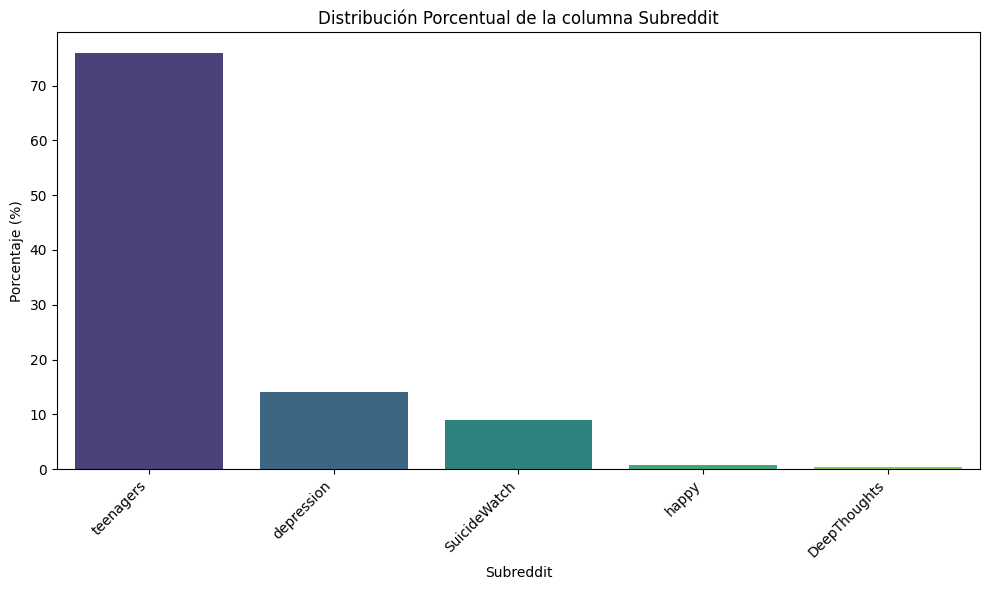

In [31]:
import matplotlib.pyplot as plt
# Gráfico de distribución de la columna 'subreddit' en porcentaje
plt.figure(figsize=(10, 6))
subreddit_percentages = df_cleaned['subreddit'].value_counts(normalize=True).mul(100).sort_values(ascending=False)
sns.barplot(x=subreddit_percentages.index, y=subreddit_percentages.values, palette='viridis')
plt.title('Distribución Porcentual de la columna Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

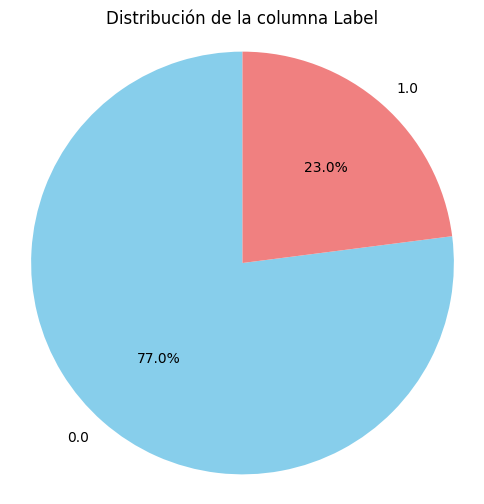

In [ ]:
import matplotlib.pyplot as plt

# Calcular el conteo de cada valor en la columna 'label'
label_counts = df_cleaned['label'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribución de la columna Label')
plt.axis('equal')  # Esto asegura que el gráfico de pastel sea un círculo.
plt.show()

In [29]:
# Calcular la longitud de cada texto en la columna 'text'
text_lengths = df_cleaned['text'].str.len()

# Calcular la longitud media
average_text_length = text_lengths.mean()

print(f"La longitud media de la columna 'text' es: {average_text_length:.2f} caracteres.")

La longitud media de la columna 'text' es: 508.79 caracteres.


In [ ]:
# Filtrar el DataFrame para obtener filas con nulos en 'created_utc'
rows_with_null_created_utc = df_cleaned[df_cleaned['created_utc'].isnull()]

# Mostrar los valores únicos de 'subreddit' en esas filas
print("Subreddits donde 'created_utc' es nulo:")
display(rows_with_null_created_utc['subreddit'].unique())

# Opcional: Mostrar el conteo de nulos por subreddit en estas filas
print("\nConteo de nulos en 'created_utc' por Subreddit:")
display(rows_with_null_created_utc['subreddit'].value_counts())

Subreddits donde 'created_utc' es nulo:


array(['teenagers', 'SuicideWatch', 'depression'], dtype=object)


Conteo de nulos en 'created_utc' por Subreddit:


,count
subreddit,
teenagers,31
depression,9
SuicideWatch,2


En created_utc hay algún nulo, podemos eliminarlo porque son 31 de teenagers (valor del que hay demasiados resultados) o bien dejarlo porque no nos es útil. Hay que ver si se tratan los valores de teenagers porque al ser muchos, el dataset se encuentra descompensado. No sé qué más visualizaciones podríamos realizar. Voy a empezar con el preprocesamiento del texto.

In [ ]:
rows_with_null_created_utc.head()

,Unnamed: 0,subreddit,title,body,upvotes,created_utc,num_comments,label,text
24399,544405,teenagers,Favorite music artist?,I'm just curious since I haven't seen any rap/...,0.0,NaN,0.0,0.0,Favorite music artist? I'm just curious since ...
33037,565840,teenagers,"/r/teenagers, what would be your dream pet?",It can be any animal and it can be the usual s...,0.0,NaN,0.0,0.0,"/r/teenagers, what would be your dream pet? It..."
33214,566332,teenagers,What are your beliefs /r/teenagers?,Religious or just normal beliefs will do.,0.0,NaN,0.0,0.0,What are your beliefs /r/teenagers? Religious ...
33281,566520,teenagers,My name is Snapper! What would you have liked ...,New birth name or you could say what nickname ...,0.0,NaN,0.0,0.0,My name is Snapper! What would you have liked ...
33399,566920,teenagers,How was your first day back at school?,For the ones that obviously had school today &...,0.0,NaN,0.0,0.0,How was your first day back at school? For the...


In [ ]:
# prompt: guarda el dataset df_cleaned

# Definir la ruta en Google Drive donde quieres guardar el archivo
output_file_path = '/content/drive/My Drive/Trabajo Inteligencia Artificial/Notebooks/reddit_depression_dataset_cleaned.csv' # Reemplaza con la ruta deseada

# Guardar el DataFrame limpio en un archivo CSV en Google Drive
try:
    df_cleaned.to_csv(output_file_path, index=False)
    print(f"DataFrame limpio guardado exitosamente en: {output_file_path}")
except Exception as e:
    print(f"Ocurrió un error al guardar el archivo: {e}")


DataFrame limpio guardado exitosamente en: /content/drive/My Drive/Trabajo Inteligencia Artificial/Notebooks/reddit_depression_dataset_cleaned.csv


# Task
Preprocesar la columna 'text' del DataFrame.

## Limpieza de texto

### Subtask:
Eliminar caracteres especiales, puntuación, números y enlaces de la columna 'text'. Convertir todo el texto a minúsculas.


**Reasoning**:
Convert the 'text' column to lowercase and remove URLs, special characters, punctuation, numbers, and extra whitespace.



In [ ]:
import re

# 1. Convert text to lowercase
df_cleaned['text'] = df_cleaned['text'].str.lower()

# 2. Remove URLs
df_cleaned['text'] = df_cleaned['text'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# 3. Remove special characters and punctuation
df_cleaned['text'] = df_cleaned['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# 4. Remove numbers
df_cleaned['text'] = df_cleaned['text'].apply(lambda x: re.sub(r'\d+', '', x))

# 5. Remove extra whitespace
df_cleaned['text'] = df_cleaned['text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Display the first few rows with the cleaned text
print("DataFrame with cleaned 'text' column:")
display(df_cleaned[['text']].head())

KeyboardInterrupt: 

## Tokenización

### Subtask:
Tokenización


**Reasoning**:
Import necessary libraries, download NLTK data, and apply word tokenization to the 'text' column, storing the result in a new 'tokens' column.



**Reasoning**:
The previous attempt to download the NLTK punkt tokenizer failed due to an incorrect exception type in the except block. The correct way to handle the LookupError is to simply call nltk.download('punkt').



**Reasoning**:
The traceback indicates that the 'punkt_tab' resource is also needed for tokenization. I will download this resource and then proceed with tokenization.



In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the required NLTK data for tokenization
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', quiet=True)


# Apply word tokenization to the 'text' column
df_cleaned['tokens'] = df_cleaned['text'].apply(word_tokenize)

# Display the head of the DataFrame to show the new 'tokens' column
print("DataFrame with 'tokens' column:")
display(df_cleaned.head())

## Eliminación de stop words

### Subtask:
Eliminar palabras comunes (stop words) de la columna 'tokens'.


**Reasoning**:
Implement the stop word removal process as described in the instructions, including importing necessary modules, downloading data, defining stop words, creating a removal function, and applying it to the DataFrame.



In [ ]:
import nltk
from nltk.corpus import stopwords

# Download English stopwords if not already present
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords', quiet=True)

# Define a set of English stop words
stop_words = set(stopwords.words('english'))

# Create a function to remove stop words from a list of tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# Apply the function to the 'tokens' column
df_cleaned['tokens_no_stopwords'] = df_cleaned['tokens'].apply(remove_stopwords)

# Display the head of the DataFrame with the new column
print("DataFrame with 'tokens_no_stopwords' column:")
display(df_cleaned.head())

**Reasoning**:
The previous code block failed because the `nltk` module was not imported before trying to download the stopwords. The corrected code block should import `nltk` first.

